In [1]:
from keras.datasets import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

2022-06-27 14:02:52.037585: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-27 14:02:52.037608: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train), (_, _) = mnist.load_data()

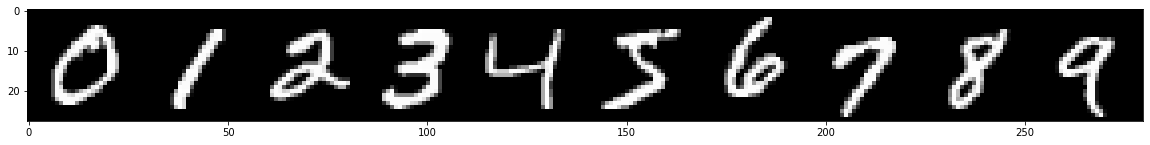

In [3]:
y_train = np.array(y_train)
images = []
for i in range(10):
    example_index = np.where(y_train == i)[0][0]
    images.append(X_train[example_index])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(100)
plt.imshow(np.concatenate(images, axis=1), cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
X_train = X_train.reshape(len(X_train), 28 * 28)

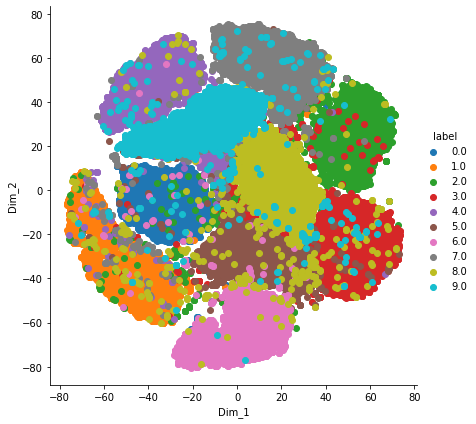

In [5]:
model = TSNE( \
    n_components=2, \
    random_state=0, \
    early_exaggeration=50, \
    learning_rate='auto', \
    n_iter=1000, \
    init='random',
)

tsne_data = model.fit_transform(X_train)

tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6) \
    .map(plt.scatter, "Dim_1", "Dim_2") \
    .add_legend()
plt.show()

In [ ]:
dd